<a href="https://colab.research.google.com/github/itsmecharan08/ML-LAB/blob/main/CBMLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install fpdf

# Feauture Selection

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("\n--- Dataframe Overview ---")
print(df.head())
print("\nColumns in DataFrame:")
print(df.columns)

features = df.iloc[:, :-1]
print("\n--- Features Overview ---")
print(features.head())

target_variable = df.iloc[:, -1]
print("\n--- Target Variable Overview ---")
print(target_variable.head())

scaled_features = StandardScaler().fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\n--- Scaled DataFrame ---")
print(scaled_df.head())

correlation_matrix = scaled_df.corr().abs()
print("\n--- Absolute Correlation Matrix ---")
print(correlation_matrix)

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
print("\n--- Upper Correlation Matrix ---")
print(upper_triangle)

columns_to_remove = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.95)]
print("\nColumns to be removed based on correlation:")
print(columns_to_remove)

final_df = scaled_df.drop(columns=columns_to_remove)
print("\n--- DataFrame After Dropping Columns ---")
print(final_df.head())

result_df = pd.concat([final_df, target_variable], axis=1)
print("\n--- Final DataFrame ---")
print(result_df.head())


--- Dataframe Overview ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Columns in DataFrame:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

--- Features Overview ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4

In [ ]:
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

cardata = pd.read_csv("auto-mpg.csv")
print("car data \n")
df = pd.DataFrame(cardata)
display(df.head(2))
print("------------------------------------------------------------------------------------------------------")

cardata['horsepower'] = pd.to_numeric(cardata['horsepower'], errors='coerce').fillna(0).astype(int)
carname = cardata.iloc[:, 8].values
labelencoder = LabelEncoder()
carname = labelencoder.fit_transform(carname)

predictors = cardata.iloc[:, 1:8]
target = cardata.iloc[:, 0].values
X = cardata.iloc[:, 0:8]
X['car name'] = carname
X['mpg'] = target

df2 = pd.DataFrame(X)
print("after label encoding \n")
display(X.head(2))
print("---------------------------------------------------------------------------------------------------")

Impfeatures = X.drop("mpg", axis=1).apply(lambda col: col.corr(X['mpg']))
indices = np.argsort(Impfeatures)
columns = df2.columns

print("features along with their correlation\n", Impfeatures)
print("---------------------------------------------------------------------------------------------------")

print("LIST OF IMPORTANT FEATURES \n")
required_features = []
for i in range(len(indices)):
    if np.abs(Impfeatures.iloc[i]) > 0.5:
        print(columns[i])
        required_features.append(columns[i])

print("---------------------------------------------------------------------------------------------------")
newdf = df2[required_features]

print("final data frame \n")
display(newdf.head())


car data 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


------------------------------------------------------------------------------------------------------
after label encoding 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36


---------------------------------------------------------------------------------------------------
features along with their correlation
 cylinders      -0.775396
displacement   -0.804203
horsepower     -0.754276
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
car name        0.273936
dtype: float64
---------------------------------------------------------------------------------------------------
LIST OF IMPORTANT FEATURES 

mpg
cylinders
displacement
horsepower
acceleration
model year
---------------------------------------------------------------------------------------------------
final data frame 



,mpg,cylinders,displacement,horsepower,acceleration,model year
0,18.0,8,307.0,130,12.0,70
1,15.0,8,350.0,165,11.5,70
2,18.0,8,318.0,150,11.0,70
3,16.0,8,304.0,150,12.0,70
4,17.0,8,302.0,140,10.5,70


In [ ]:
from sklearn.feature_selection import mutual_info_classif

df = pd.read_csv("Qinspection.csv")
print("Dataframe \n", df.head())
print("---------------------------------------------------------------------------------------------")

X = df.iloc[:, 0:6]
y = df.iloc[:, -1]
print("Predictors \n\n", X.head())
print("---------------------------------------------------------------------------------------------")
print("Target \n\n", y.head())
print("---------------------------------------------------------------------------------------------")

mi_scores = mutual_info_classif(X, y)
print("Mutual Information \n\n", mi_scores)
print("---------------------------------------------------------------------------------------------")

features = df.columns
print("Features \n\n", features)
print("---------------------------------------------------------------------------------------------")
print("Features alongwith Mutual Information \n\n")

for feature in zip(features, mi_scores):
    display(feature)
print("---------------------------------------------------------------------------------------------")

selected_features = []
for feature in zip(features, mi_scores):
    if feature[1] > 0.5:
        selected_features.append(feature[0])
print("Final Features with threshold greater than 0.5 \n")
print(selected_features)
print("---------------------------------------------------------------------------------------------")

final_df = df[selected_features]
final_df = pd.concat([final_df, y], axis=1)
print("Final Data Frame \n\n", final_df.head())
print("---------------------------------------------------------------------------------------------")


Dataframe 
    feature1  feature2  feature3  feature4  feature5  feature6 class
0       4.9       4.7       3.2       1.3       0.2       0.3     A
1       4.8       4.6       3.1       1.5       0.2       0.3     A
2       5.2       5.0       3.6       1.4       0.2       0.3     A
3       5.6       5.4       3.9       1.7       0.4       0.5     A
4       4.8       4.6       3.4       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------
Predictors 

    feature1  feature2  feature3  feature4  feature5  feature6
0       4.9       4.7       3.2       1.3       0.2       0.3
1       4.8       4.6       3.1       1.5       0.2       0.3
2       5.2       5.0       3.6       1.4       0.2       0.3
3       5.6       5.4       3.9       1.7       0.4       0.5
4       4.8       4.6       3.4       1.4       0.3       0.4
---------------------------------------------------------------------------------------------
Target

('feature1', 0.49918115223673243)

('feature2', 0.4826621419980466)

('feature3', 0.25732534636240323)

('feature4', 0.9817912465594989)

('feature5', 0.9771115984907008)

('feature6', 0.9805417507130443)

---------------------------------------------------------------------------------------------
Final Features with threshold greater than 0.5 

['feature4', 'feature5', 'feature6']
---------------------------------------------------------------------------------------------
Final Data Frame 

    feature4  feature5  feature6 class
0       1.3       0.2       0.3     A
1       1.5       0.2       0.3     A
2       1.4       0.2       0.3     A
3       1.7       0.4       0.5     A
4       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------


In [ ]:
from sklearn.feature_selection import VarianceThreshold

exp3df=pd.read_csv("Qinspection.csv")
print("Dataframe \n",exp3df.head())
print("---------------------------------------------------------------------------------------------")
predictors=exp3df.iloc[:,0:6]
target=exp3df.iloc[:,-1]
print("Predictors \n\n",predictors.head())
print("---------------------------------------------------------------------------------------------")
print("Target \n\n",target.head())
print("---------------------------------------------------------------------------------------------")
features=exp3df.columns
print("Features \n\n",features)
print("---------------------------------------------------------------------------------------------")
selector = VarianceThreshold(threshold=.6)
selector.fit(predictors)
selector_predictor=selector.fit_transform(predictors)
print("Selector Predictor \n",selector_predictor[:5])
print("---------------------------------------------------------------------------------------------")
print("features along with their variance \n")
for s in zip(features,selector.variances_):
  display(s)

print("---------------------------------------------------------------------------------------------")
remaining_features = predictors.columns[selector.get_support()]
print("Features with Threshold 0.6 \n",remaining_features)
print("---------------------------------------------------------------------------------------------")
finaldf=exp3df[remaining_features]
finaldf=pd.concat([finaldf,target],axis=1)
print("Final Data Frame \n",finaldf.head())
print("---------------------------------------------------------------------------------------------")

Dataframe 
    feature1  feature2  feature3  feature4  feature5  feature6 class
0       4.9       4.7       3.2       1.3       0.2       0.3     A
1       4.8       4.6       3.1       1.5       0.2       0.3     A
2       5.2       5.0       3.6       1.4       0.2       0.3     A
3       5.6       5.4       3.9       1.7       0.4       0.5     A
4       4.8       4.6       3.4       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------
Predictors 

    feature1  feature2  feature3  feature4  feature5  feature6
0       4.9       4.7       3.2       1.3       0.2       0.3
1       4.8       4.6       3.1       1.5       0.2       0.3
2       5.2       5.0       3.6       1.4       0.2       0.3
3       5.6       5.4       3.9       1.7       0.4       0.5
4       4.8       4.6       3.4       1.4       0.3       0.4
---------------------------------------------------------------------------------------------
Target

('feature1', 0.6976345486111111)

('feature2', 0.6976345486111113)

('feature3', 0.19400414737654317)

('feature4', 3.1096484375)

('feature5', 0.5760411844135802)

('feature6', 0.5760411844135803)

---------------------------------------------------------------------------------------------
Features with Threshold 0.6 
 Index(['feature1', 'feature2', 'feature4'], dtype='object')
---------------------------------------------------------------------------------------------
Final Data Frame 
    feature1  feature2  feature4 class
0       4.9       4.7       1.3     A
1       4.8       4.6       1.5     A
2       5.2       5.0       1.4     A
3       5.6       5.4       1.7     A
4       4.8       4.6       1.4     A
---------------------------------------------------------------------------------------------


In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris_data = pd.read_csv("Iris.csv")
df = pd.DataFrame(iris_data)
print("iris dataset \n")
display(df.head())
print("-----------------------------------------------------------------------------------------")

features = iris_data.iloc[:, 1:5]
target = iris_data.iloc[:, -1]
chi2_selector = SelectKBest(chi2, k=2)
selected_features = chi2_selector.fit_transform(features, target)

print('Original feature number:', features.shape[1])
print('Reduced feature number:', selected_features.shape[1])
print("-------------------------------------------------------------------------------------------")
print("scores for the features \n")
for index in range(len(chi2_selector.scores_)):
    print('Feature %d: %f' % (index, chi2_selector.scores_[index]))
print("-------------------------------------------------------------------------------------------")
print("selected features \n")
chosen_features = chi2_selector.get_feature_names_out()
print(chosen_features)
print("-------------------------------------------------------------------------------------------")

new_df = iris_data[chosen_features]
new_df = pd.concat([new_df, target], axis=1)
print("final data frame \n")
display(new_df.head())


iris dataset 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


-----------------------------------------------------------------------------------------
Original feature number: 4
Reduced feature number: 2
-------------------------------------------------------------------------------------------
scores for the features 

Feature 0: 10.817821
Feature 1: 3.594499
Feature 2: 116.169847
Feature 3: 67.244828
-------------------------------------------------------------------------------------------
selected features 

['PetalLengthCm' 'PetalWidthCm']
-------------------------------------------------------------------------------------------
final data frame 



,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

iris_data = pd.read_csv("Iris.csv")
df = pd.DataFrame(iris_data)
print("iris dataset \n")
display(df.head())
print("-----------------------------------------------------------------------------------------")
features_data = iris_data.iloc[:, 1:5]
target_data = iris_data.iloc[:, -1]
selector = SelectKBest(f_classif, k=2)
selected_features_data = selector.fit_transform(features_data, target_data)
feature_names = selector.get_feature_names_out()
new_df = df[feature_names]
new_df = pd.concat([new_df, target_data], axis=1)
display(new_df.head())

iris dataset 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


-----------------------------------------------------------------------------------------


,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


# **Regression**

Dataframe 



,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


---------------------------------------------------------------------------------------------------
Average time taken 

97.21428571428571
---------------------------------------------------------------------------------------------------
Performing Linear Regression 

Intercept:  4.161654135338296
Coefficients:  [15.50877193]
---------------------------------------------------------------------------------------------------
adding predicted values to dataframe 



,Units,Minutes,predicted
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742


---------------------------------------------------------------------------------------------------
adding error column to dataframe 



,Units,Minutes,predicted,error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258


---------------------------------------------------------------------------------------------------
root mean squared error 

4.991767300317866


Text(7, 140, 'bestfit')

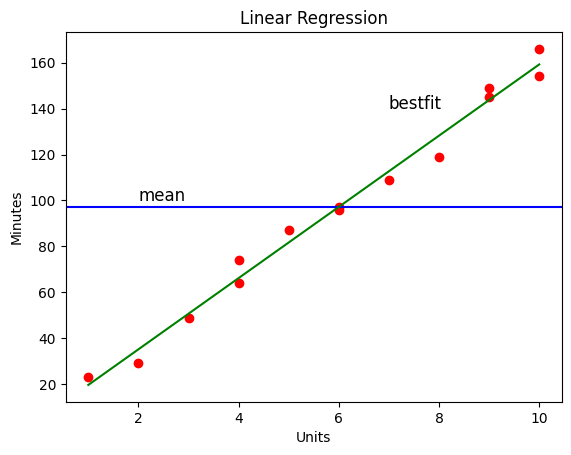

In [ ]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv("computers.csv")
df = pd.DataFrame(df)
print("Dataframe \n")
display(df.head())
print("---------------------------------------------------------------------------------------------------")

print("Average time taken \n")
mean = df["Minutes"].mean()
print(mean)
print("---------------------------------------------------------------------------------------------------")

x = df["Units"]
y = df["Minutes"]
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

print("Performing Linear Regression \n")
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)
print("---------------------------------------------------------------------------------------------------")

print("adding predicted values to dataframe \n")
c = model.intercept_
m = model.coef_
df["predicted"] = c + m * df["Units"]
display(df.head())
print("---------------------------------------------------------------------------------------------------")

print("adding error column to dataframe \n")
df["error"] = df["predicted"] - df["Minutes"]
display(df.head())
print("---------------------------------------------------------------------------------------------------")

print("root mean squared error \n")
print((sum(df["error"]**2) / len(df))**0.5)

fig, ax = plt.subplots()
ax.scatter(df["Units"], df["Minutes"], color="red")
ax.axhline(y=mean, c="b")
ax.plot(df["Units"], df["predicted"], c="g")
ax.set_xlabel("Units")
ax.set_ylabel("Minutes")
ax.set_title("Linear Regression")
plt.text(2, 100, "mean", fontsize=12)
plt.text(7, 140, "bestfit", fontsize=12)

# **Logistic regression**

Dataframe 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


Predictors 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


---------------------------------------------------------------------------------------------------
Target 



,Outcome
0,1
1,0


---------------------------------------------------------------------------------------------------
Scaled Predictors 



,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672


---------------------------------------------------------------------------------------------------
model score 

 The confusion matrix is=
[[120  31]
 [ 30  50]]
---------------------------------------------------------------------------------------------------
The accuracy score is=
0.7359307359307359
---------------------------------------------------------------------------------------------------
 The confusion matrix is in the graphical form


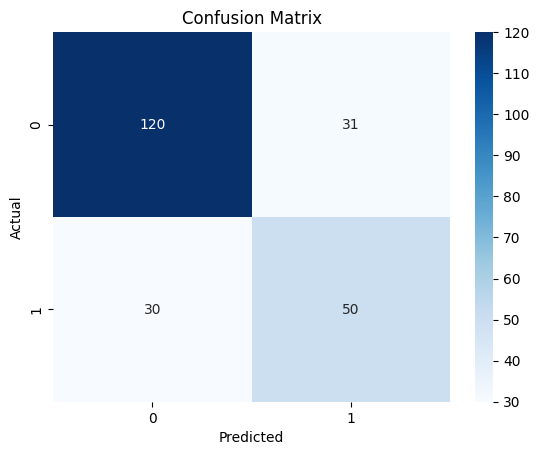

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data="pima-indians-diabetes.csv"
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df=pd.DataFrame(pd.read_csv(data,names=columns))
print("Dataframe \n")
display(df.head(2))
predictors=df.iloc[:,0:8]
target=df.iloc[:,-1]
print("Predictors \n")

display(predictors.head(2))
print("---------------------------------------------------------------------------------------------------")
print("Target \n")
display(target.head(2))
print("---------------------------------------------------------------------------------------------------")
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)
print("Scaled Predictors \n")
display(pd.DataFrame(predictors_scaled).head(2))
print("---------------------------------------------------------------------------------------------------")
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, target, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("model score \n")
model.score(X_test,y_test)
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(" The confusion matrix is=")
print(cm)
print("---------------------------------------------------------------------------------------------------")
print("The accuracy score is=")
print(accuracy_score(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")
print(" The confusion matrix is in the graphical form")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Multilinear regression**


Mean Absolute Error (MAE): 6.944369797146578
Mean Squared Error (MSE): 52.76086194096114
Root Mean Squared Error (RMSE): 7.263667251530809
R-squared (R2): 0.9934163222534675
Adjusted R-squared: 0.9835408056336689

Prediction for new house (2000 sq ft, 3 bedrooms, 10 years old): $340848.23

Actual Prices vs Predicted Prices:
Actual Price: $320000.00 	 Predicted Price: $323925.33
Actual Price: $410000.00 	 Predicted Price: $404403.85
Actual Price: $360000.00 	 Predicted Price: $353681.29
Actual Price: $520000.00 	 Predicted Price: $526524.86
Actual Price: $460000.00 	 Predicted Price: $470382.92
Actual Price: $580000.00 	 Predicted Price: $571081.75


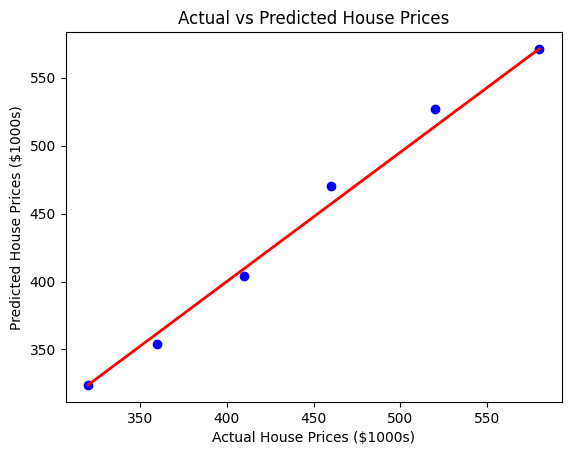

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = np.array([[1600, 3, 12], [1900, 4, 14], [2500, 3, 18], [3100, 5, 7], [3600, 4, 13], [4200, 5, 4]])
Y = np.array([320, 410, 360, 520, 460, 580])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
new_data = np.array([2000, 3, 10]).reshape(1, -1)
new_prediction = model.predict(new_data)

mae = mean_absolute_error(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y, Y_pred)
n = len(Y)
k = X.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")
print(f"\nPrediction for new house (2000 sq ft, 3 bedrooms, 10 years old): ${new_prediction[0] * 1000:.2f}")

print("\nActual Prices vs Predicted Prices:")
for i in range(len(Y)):
    print(f"Actual Price: ${Y[i] * 1000:.2f} \t Predicted Price: ${Y_pred[i] * 1000:.2f}")

plt.scatter(Y, Y_pred, color='blue')
plt.plot([min(Y), max(Y)], [min(Y_pred), max(Y_pred)], color='red', linewidth=2)
plt.xlabel('Actual House Prices ($1000s)')
plt.ylabel('Predicted House Prices ($1000s)')
plt.title('Actual vs Predicted House Prices')
plt.show()


# **Naive Base**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Hot', 'Mild', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df.drop('PlayTennis', axis=1))
df_encoded['PlayTennis'] = df['PlayTennis'].map({'No': 0, 'Yes': 1})

X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

display(df_encoded.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

print("\nPredicted Probabilities for Test Data:")

for i, probs in enumerate(y_prob):
    print(f"Instance {i+1}: No: {probs[0]:.4f}, Yes: {probs[1]:.4f}")

new_instance = {
    'Outlook': ['Rain'],
    'Temperature': ['Cool'],
    'Humidity': ['High'],
    'Windy': [True]
}

new_instance_df = pd.DataFrame(new_instance)
new_instance_encoded = pd.get_dummies(new_instance_df)
new_instance_encoded = new_instance_encoded.reindex(columns=X.columns, fill_value=0)

new_prob = model.predict_proba(new_instance_encoded)
new_pred = model.predict(new_instance_encoded)

print("\nPredicted Probabilities for New Instance:")
print(f"No: {new_prob[0][0]:.4f}, Yes: {new_prob[0][1]:.4f}")

final_prediction = "Yes" if new_pred[0] == 1 else "No"
print(f"\nFinal Prediction for New Instance: Play Tennis? {final_prediction}")

,Windy,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,PlayTennis
0,False,False,False,True,False,True,False,True,False,0
1,True,False,False,True,False,True,False,True,False,0
2,False,True,False,False,False,True,False,True,False,1
3,False,False,True,False,False,False,True,True,False,1
4,False,False,True,False,True,False,False,False,True,1


Accuracy: 0.8

Confusion Matrix:
 [[1 1]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5


Predicted Probabilities for Test Data:
Instance 1: No: 0.0000, Yes: 1.0000
Instance 2: No: 0.0000, Yes: 1.0000
Instance 3: No: 1.0000, Yes: 0.0000
Instance 4: No: 0.0000, Yes: 1.0000
Instance 5: No: 0.0000, Yes: 1.0000

Predicted Probabilities for New Instance:
No: 0.0000, Yes: 1.0000

Final Prediction for New Instance: Play Tennis? Yes


# **SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

iris = load_iris()
print(iris)
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

new_instance = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)
new_prediction = svm.predict(new_instance)

print("Prediction for the new instance:", iris.target_names[new_prediction][0])

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# **KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = df
y = iris.target
display(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

new_instance = {
    'sepal length (cm)': [5.5],
    'sepal width (cm)': [2.6],
    'petal length (cm)': [4.4],
    'petal width (cm)': [1.2]
}

new_instance_df = pd.DataFrame(new_instance)
new_pred = knn.predict(new_instance_df)

final_prediction = iris.target_names[new_pred[0]]
print(f"\nFinal Prediction for New Instance: {final_prediction}")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Final Prediction for New Instance: versicolor


# **Decision Tree classfier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('spambase.csv')
display(df.head())
predictors = df.iloc[:, 0:57]
target = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_split=4, min_impurity_decrease=0.01, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nTest 1 with parameters min_samples_split=4, min_impurity_decrease=0.01, random_state=42")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f"Decision Tree Training Score: {train_score}")
print(f"Decision Tree Testing Score: {test_score}")

clf2 = DecisionTreeClassifier(min_samples_split=7, min_impurity_decrease=0.001, random_state=42)
print("\nTest 2 with parameters min_samples_split=7, min_impurity_decrease=0.001, random_state=42")
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
train_score = clf2.score(X_train, y_train)
test_score = clf2.score(X_test, y_test)

print(f"Decision Tree Training Score: {train_score}")
print(f"Decision Tree Testing Score: {test_score}")

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_req_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Test 1 with parameters min_samples_split=4, min_impurity_decrease=0.01, random_state=42
Accuracy: 87.95%
Decision Tree Training Score: 0.9
Decision Tree Testing Score: 0.8794788273615635

Test 2 with parameters min_samples_split=7, min_impurity_decrease=0.001, random_state=42
Accuracy: 92.29%
Decision Tree Training Score: 0.9543478260869566
Decision Tree Testing Score: 0.9229098805646037


# **Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('spambase.csv')
display(df.head())
predictors = df.iloc[:, 0:57]
target = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

print("\nTest 1 with parameters n_estimators=50, random_state=42, algorithm='SAMME'\n")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
train_score = ada_clf.score(X_train, y_train)
print(f"Training Score: {train_score:.4f}")
test_score = ada_clf.score(X_test, y_test)
print(f"Testing Score: {test_score:.4f}")

ada_clf2 = AdaBoostClassifier(n_estimators=20, random_state=42, algorithm='SAMME')
print("\nTest 2 with parameters n_estimators=20, random_state=42, algorithm='SAMME'\n")
ada_clf2.fit(X_train, y_train)
y_pred = ada_clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
train_score = ada_clf2.score(X_train, y_train)
print(f"Training Score: {train_score:.4f}")
test_score = ada_clf2.score(X_test, y_test)
print(f"Testing Score: {test_score:.4f}")

print("Classification Report for ada_clf (n_estimators=50):")
print(classification_report(y_test, y_pred))

print("\nClassification Report for ada_clf2 (n_estimators=20):")
print(classification_report(y_test, y_pred))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_req_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Test 1 with parameters n_estimators=50, random_state=42, algorithm='SAMME'

Accuracy: 92.62%
Training Score: 0.9342
Testing Score: 0.9262

Test 2 with parameters n_estimators=20, random_state=42, algorithm='SAMME'

Accuracy: 90.88%
Training Score: 0.9101
Testing Score: 0.9088
Classification Report for ada_clf (n_estimators=50):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       531
           1       0.90      0.88      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921


Classification Report for ada_clf2 (n_estimators=20):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       531
           1       0.90      0.88      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg   

# Random Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('spambase.csv')
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model1 = RandomForestClassifier(n_estimators=12, max_depth=20, random_state=42)
model1.fit(X_train, y_train)
predictions_test1 = model1.predict(X_test)
predictions_train1 = model1.predict(X_train)
accuracy_test1 = accuracy_score(y_test, predictions_test1)
accuracy_train1 = accuracy_score(y_train, predictions_train1)

print("\nParam 1: n_estimators=12, max_depth=20, random_state=42")
print("Test Accuracy:", accuracy_test1)
print("Train Accuracy:", accuracy_train1)
print(classification_report(y_test, predictions_test1))

model2 = RandomForestClassifier(n_estimators=20, max_depth=30, random_state=0)
model2.fit(X_train, y_train)
predictions_test2 = model2.predict(X_test)
predictions_train2 = model2.predict(X_train)
accuracy_test2 = accuracy_score(y_test, predictions_test2)
accuracy_train2 = accuracy_score(y_train, predictions_train2)

print("\nParam 2: n_estimators=20, max_depth=30, random_state=0")
print("Test Accuracy:", accuracy_test2)
print("Train Accuracy:", accuracy_train2)
print(classification_report(y_test, predictions_test2))


Param 1: n_estimators=12, max_depth=20, random_state=42
Test Accuracy: 0.944243301955105
Train Accuracy: 0.991304347826087
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       804
           1       0.95      0.91      0.93       577

    accuracy                           0.94      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.94      0.94      0.94      1381


Param 2: n_estimators=20, max_depth=30, random_state=0
Test Accuracy: 0.9507603186097031
Train Accuracy: 0.9972049689440994
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       804
           1       0.96      0.92      0.94       577

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381



# K-Means Clustering

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


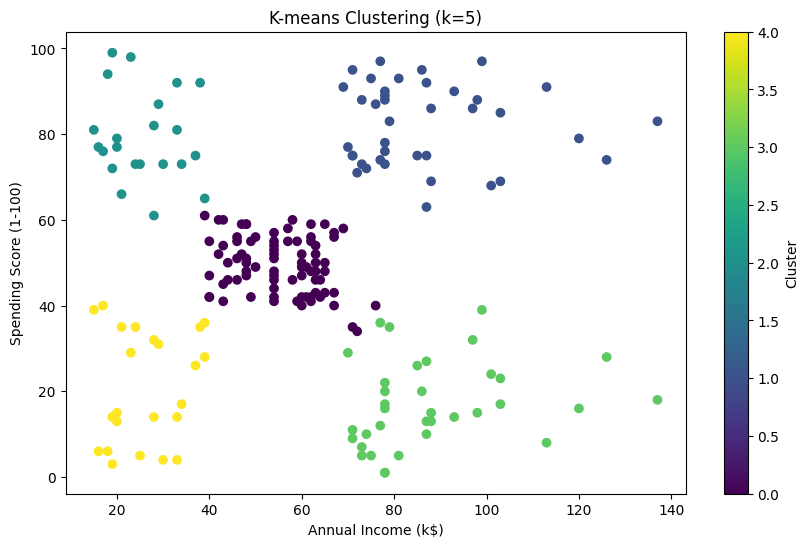

Within-Cluster Sum of Squares [270030.56000000006, 183702.57456140354, 106397.21385076197, 73929.48557183654, 44497.185468155025, 40873.81696636697, 33691.22597402598, 26734.88961038961, 24814.178679823046, 23150.589718784086]


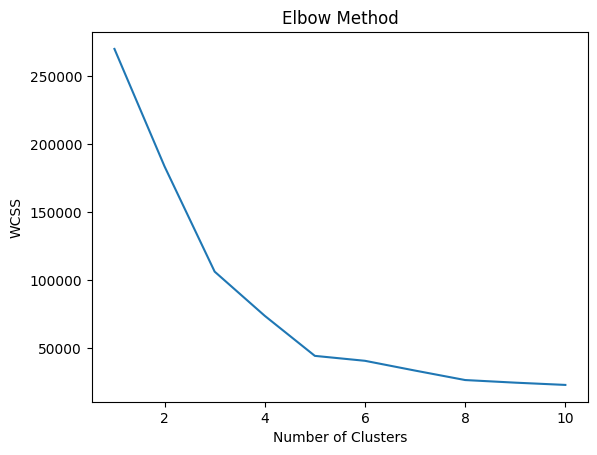

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Mall_customers.csv')
print(df.head())

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
features = df[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(features)
    if k == 5:
      plt.figure(figsize=(10, 6))
      plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
      plt.title(f'K-means Clustering (k={k})')
      plt.xlabel('Annual Income (k$)')
      plt.ylabel('Spending Score (1-100)')
      plt.colorbar(label='Cluster')
      plt.show()

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

print("Within-Cluster Sum of Squares",wcss)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# DB Scan

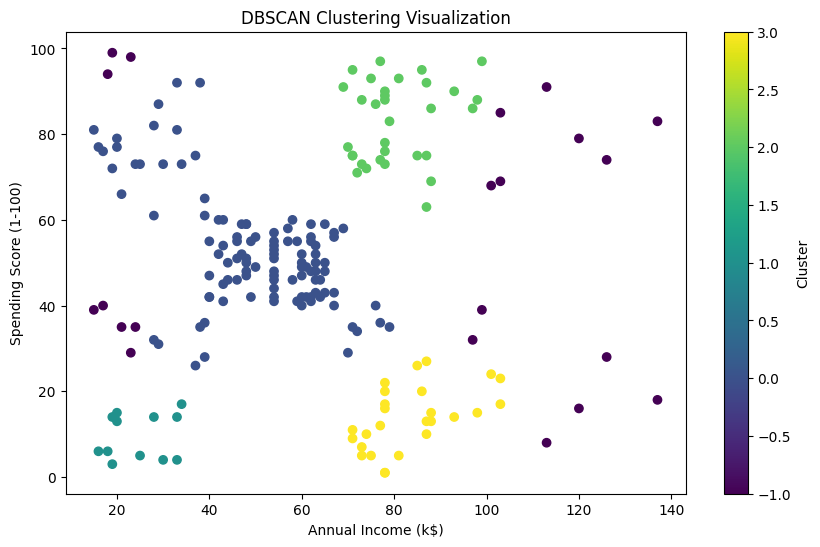

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_customers.csv')

X_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

dbscan_model = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan_model.fit_predict(X_scaled)

data['Cluster'] = labels

plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

# Agglomerative Clustering

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


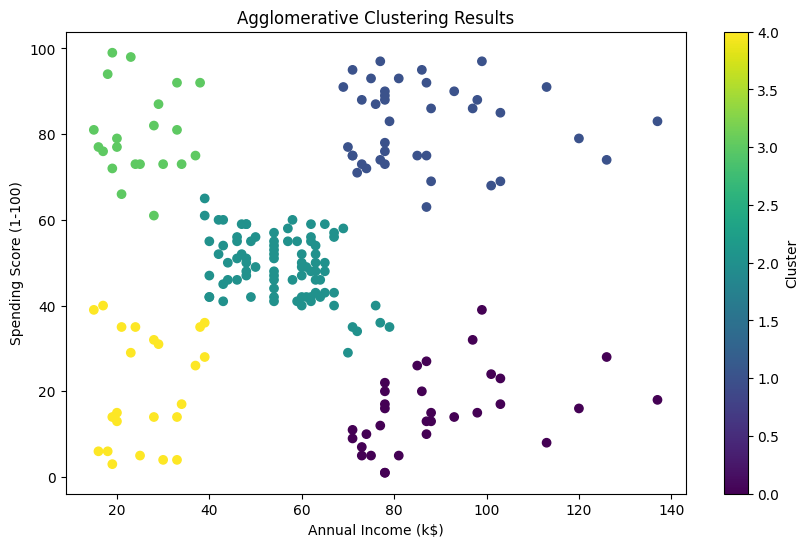

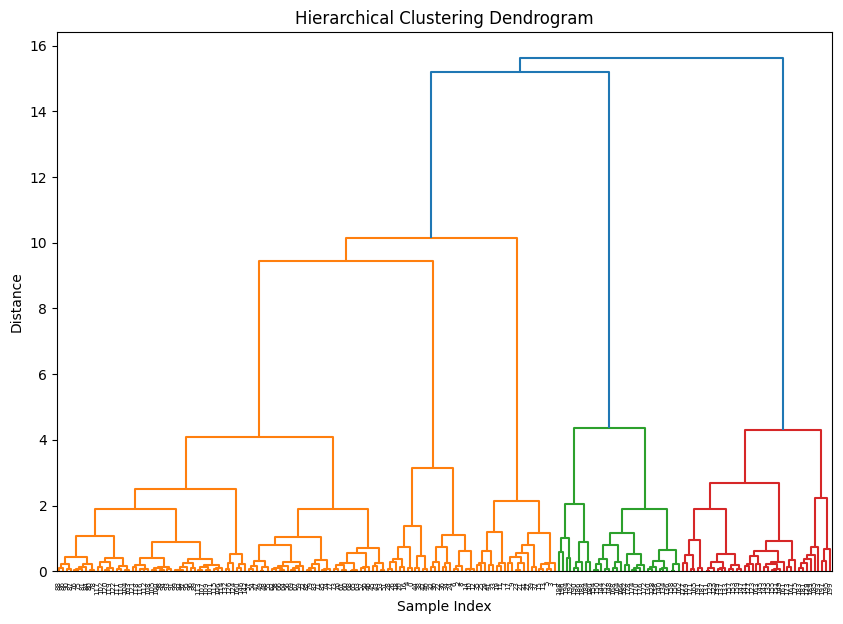

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_customers.csv')

X_data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

agg_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = agg_model.fit_predict(X_scaled)
df['Cluster'] = cluster_labels
print(df.head())

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

linkage_matrix = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from fpdf import FPDF
from IPython.core.getipython import get_ipython

class PDF(FPDF):
    def header(self):
        pass

    def footer(self):
        pass

pdf = PDF()
# Set margins: left=10, top=10, right=0
pdf.set_margins(10, 20, 0)
# Increase font size to 8
pdf.set_font('Arial', '', 8)

ipython = get_ipython()
cells = ipython.user_ns['In']

pdf.add_page()  # Add the first page before starting to add content

for i, cell in enumerate(cells):
    if i >= 5 and cell.strip() and not cell.startswith('%'):
        pdf.multi_cell(0, 5, cell)
        pdf.add_page()  # Add a new page for each subsequent cell

pdf_output_path = '/content/notebook_cells.pdf'
pdf.output(pdf_output_path)
pdf_output_path

'/content/notebook_cells.pdf'

In [ ]:
!pip install PyPDF2 fpdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.7 MB/s eta 0:00:00


In [ ]:
import os
from PyPDF2 import PdfReader, PdfWriter
from fpdf import FPDF

def create_empty_page(temp_file):
    # Create a new PDF with an empty page and save it to a file
    pdf = FPDF()
    pdf.add_page()
    pdf.output(temp_file)

def modify_pdf(input_pdf_path, output_pdf_path):
    # Read the existing PDF
    reader = PdfReader(input_pdf_path)
    writer = PdfWriter()

    # Temporary file for the empty page
    temp_empty_pdf = "empty_page.pdf"
    create_empty_page(temp_empty_pdf)

    for page_number in range(len(reader.pages)):
        # Add the current page
        writer.add_page(reader.pages[page_number])

        # Add an empty page unless it's the 10th page
        if page_number != 9:  # 9 is the index for the 10th page
            empty_reader = PdfReader(temp_empty_pdf)
            writer.add_page(empty_reader.pages[0])

    # Write the modified PDF to a new file
    with open(output_pdf_path, 'wb') as output_pdf:
        writer.write(output_pdf)

    # Clean up the temporary file
    os.remove(temp_empty_pdf)

# Specify the input and output PDF file names
input_pdf = 'notebook_cells (1)-cropped.pdf'  # Change this to your input PDF file path
output_pdf = 'exam.pdf'

# Modify the PDF
modify_pdf(input_pdf, output_pdf)

print("PDF modified successfully and saved as", output_pdf)

PDF modified successfully and saved as exam.pdf


In [ ]:
import PyPDF2
def swap_and_add_blank_page(input_pdf_path):
    # Open the original PDF
    with open(input_pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        writer = PyPDF2.PdfWriter()

        # Add a blank page at the start
        writer.add_blank_page(width=595.2, height=841.8)  # A4 size in points

        # Swap adjacent pages
        num_pages = len(reader.pages)
        for i in range(0, num_pages, 2):
            if i + 1 < num_pages:  # Check if the next page exists
                writer.add_page(reader.pages[i + 1])  # Add the next page first
            writer.add_page(reader.pages[i])  # Then add the current page

        # Save the modified PDF
        output_pdf_path = 'zoutput.pdf'
        with open(output_pdf_path, 'wb') as output_file:
            writer.write(output_file)

    return output_pdf_path

# Step 5: Call the function and get the output PDF path
output_pdf_path = swap_and_add_blank_page('ML_LAB.pdf')